# Luria - Delbruck Experiment

In [1]:
from sympy import *

## analytical derivations

here we derive the basic expressions.

Probability of events (mutational hypothesis):

* $ (1-\mu)^3$
* $ \mu\,(1-\mu)^2$
* $ \mu\,(1-\mu)^2$
* $ \mu^2\,(1-\mu)$
* $ \mu $

Probability of events (adaptive hypothesis):

* $ (1-\mu)^2$
* $ \mu\,(1-\mu)$
* $ \mu\,(1-\mu)$
* $ \mu^2$
* 



In [2]:
u = symbols("u")

### mutational hypothesis

In [126]:
simplify((1-u)**3 + 2*u*(1-u)**2 + (1-u)*u**2 + u)

1

In [7]:
mean = simplify(0*(1-u)**3 + 1*2*u*(1-u)**2 + 2*(1-u)*u**2 + 2*u)
en2 = simplify(0*(1-u)**3 + 1*2*u*(1-u)**2 + 2**2*(1-u)*u**2 + 2**2*u)
var = simplify(en2-mean**2)

In [8]:
mean,var

(2*u*(-u + 2), 2*u*(-u**2 - 2*u*(u - 2)**2 + 3))

In [12]:
fano = simplify(var/mean)
fano

(u**2 + 2*u*(u - 2)**2 - 3)/(u - 2)

$\frac{3-\mu^2 - 2\mu(\mu-2)^2}{2-\mu}$

### Adaptive hypothesis

In [13]:
mean_adap = simplify(0*(1-u)**3 + 1*2*u*(1-u)**2 + 2*(1-u)*u**2)
en2_adap = simplify(0*(1-u)**3 + 1*2*u*(1-u)**2 + 2**2*(1-u)*u**2 )
var_adap = simplify(en2_adap-mean_adap**2)

In [14]:
mean_adap = simplify(0*(1-u)**2 + 1*2*u*(1-u) + 2*u**2)
en2_adap = simplify(0*(1-u)**2 + (1**2)*2*u*(1-u) + 2**2*u**2 )
var_adap = simplify(en2_adap-mean_adap**2)

simplify((1-u)**2 + 2*u*(1-u) + u**2)

1

In [15]:
mean_adap,var_adap

(2*u, 2*u*(-u + 1))

In [16]:
fano_adap = simplify(var_adap/mean_adap)
fano_adap

-u + 1

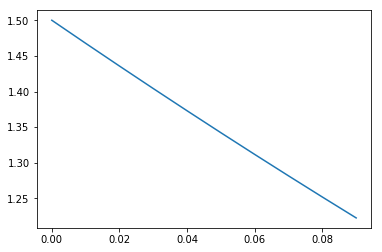

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.arange(0,.1,.01)
yy = [fano.subs(u,x) for x in xx]
plt.plot(xx,yy)

In [38]:
limit(fano,u,0)

3/2

# simulated data for the adaptive hypothesis

In [88]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

matplotlib.style.use('ggplot')

In [84]:

dist = []

for n_size in [10,20,50,100,500,1000]:
    means = []
    vars = []
    for n in range(5000):
        poisson = np.random.poisson(size=n_size)
        mean = np.mean(poisson)
        var = np.var(poisson)
#         means.append(mean)
#         vars.append(var)
        dist.append({'n':n_size,'mean':mean,'var':var})
    


In [85]:
dists = pd.DataFrame(dist)

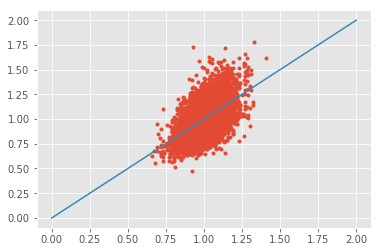

In [78]:
data = dists[dists['n']==100]

plt.plot(data['mean'],data['var'],ls='',marker='.')
plt.plot([0,2],[0,2])

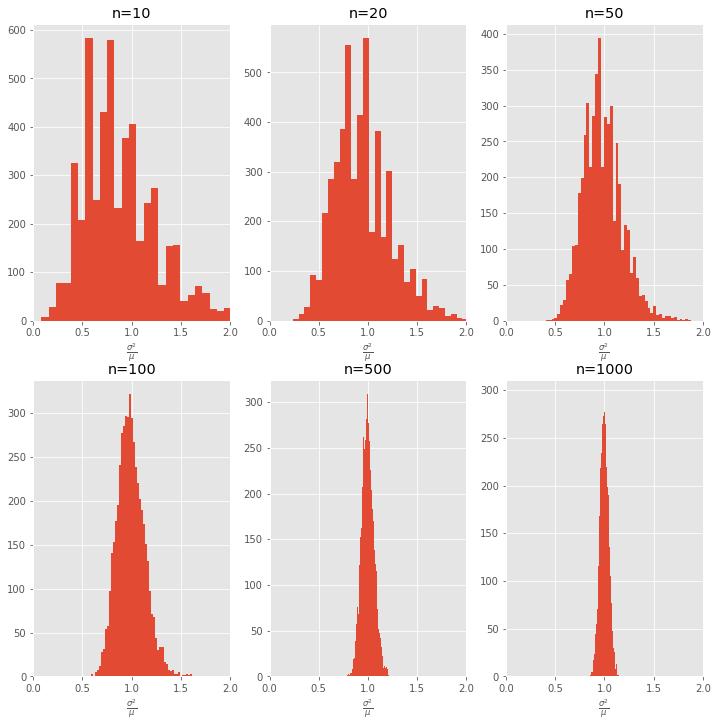

In [124]:
plt.subplots(figsize=(12,12))
for idx,n in enumerate([10,20,50,100,500,1000]):
    
    plt.subplot(2,3,idx+1)
    data = dists[dists['n']==n]
    plt.title('n='+str(n))

    ratios = data['var']/(data['mean'])
    plt.xlabel(r"$\frac{\sigma^2}{\mu} $")
    plt.hist(ratios,bins=50)
    plt.xlim(0,2)

In [113]:
data = dists[dists['n']==10]
ratios = sorted(data['var']/(data['mean']))

cdf = np.cumsum(sorted(ratios)).tolist()
cdf = np.array(cdf)/np.array(cdf)[-1]

[0.74444444 1.29406487]


Text(0.5, 0, '$\\frac{\\sigma}{\\mu} $')

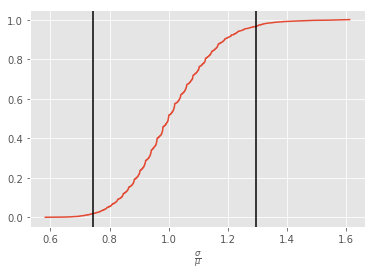

In [121]:
data = dists[dists['n']==100]
ratios = sorted(data['var']/(data['mean']))

cdf = np.cumsum(sorted(ratios)).tolist()#/(np.cumsum(ratios))
cdf = np.array(cdf)/np.array(cdf)[-1]

plt.plot(ratios,cdf)
cutoffs = np.percentile(ratios,[2.5,97.5])
plt.axvline(cutoffs[0],c='k')
plt.axvline(cutoffs[1],c='k');
print(cutoffs)
plt.xlabel(r"$\frac{\sigma}{\mu} $")



How would you calculate the minimum number of replicates to detect a ratio deviation of at least $r$?

